### COMP-3703 Intro to Artificial Intelligence Assignment 2

Name: Qichun Yu

### Question 1 Setting up the notebook.

a) Create a new Jupyter Notebooks worksheet and name it Project2YourName. <br>
b) Import pandas, load the dataset (image_attributes_labels.txt). Note: the file is space separated. Header set to None; error and warning set to False; use only the first three columns; and names: imgid, attid, present.

In [1]:
import pandas as pd

imgatt = pd.read_csv("CUB_200_2011/attributes/image_attribute_labels.txt", 
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                    usecols=[0,1,2], names=['imgid', 'attid', 'present'])

c) Output the head, and output the number of rows and columns.

In [2]:
imgatt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [3]:
# output the number of rows
print(f"There are {imgatt.shape[0]} rows.")

There are 3677856 rows.


In [4]:
# output the number of columns
print(f"There are {imgatt.shape[1]} columns.")

There are 3 columns.


### Question 2

a) Reorganize the data from question 1 so that you have one row per imgid, and 312 columns(one for each attribute). You should have 1/0 indicator for each attribute to indicate whether the imgid has that attribute. Use the pivot function. Give this data a new name different from the data in question 1

In [5]:
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

b) Output the head of this new arrangement of the data.

In [6]:
imgatt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

c) Display the number of rows and columns.

In [7]:
imgatt2.shape

(11788, 312)

In [8]:
# output the number of rows
print(f"There are {imgatt2.shape[0]} rows.")
# output the number of columns
print(f"There are {imgatt2.shape[1]} columns.")

There are 11788 rows.
There are 312 columns.


### Question 3

a) Create your image labels data: read in the image class labels. Use .set_index(‘imgid’).

In [9]:
img_labels = pd.read_csv("CUB_200_2011/image_class_labels.txt", sep=' ', header=None, names=['imgid', 'label'])

img_labels = img_labels.set_index('imgid')

b) Output the head of your image labels data.

In [10]:
img_labels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

c) Output the number of rows and columns of your image labels data. 

In [11]:
img_labels.shape

(11788, 1)

In [12]:
# output the number of rows
print(f"There are {img_labels.shape[0]} rows.")
# output the number of columns
print(f"There are {img_labels.shape[1]} columns.")

There are 11788 rows.
There are 1 columns.


### Question 4

a) Attach the image labels to the attribute data. 

In [13]:
df = imgatt2.join(img_labels)
df.head()

1  2  3  4  5  6  7  8  9  10  ...  304  305  306  307  308  309  310  \
imgid                                 ...                                      
1      0  0  0  0  1  0  0  0  0   0  ...    0    0    0    0    1    0    0   
2      0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
3      0  0  0  0  1  0  0  0  0   0  ...    0    0    0    0    1    0    0   
4      0  0  0  0  1  0  0  0  0   0  ...    0    0    1    0    0    1    0   
5      0  0  0  0  1  0  0  0  0   0  ...    0    1    0    0    0    0    0   

       311  312  label  
imgid                   
1        0    0      1  
2        0    0      1  
3        1    0      1  
4        0    0      1  
5        0    0      1  

[5 rows x 313 columns]

b) Shuffle the data from part (a).

In [14]:
df = df.sample(frac=1)

In [15]:
df.head()

1  2  3  4  5  6  7  8  9  10  ...  304  305  306  307  308  309  310  \
imgid                                 ...                                      
4274   0  0  0  0  0  0  1  0  0   1  ...    0    0    0    0    0    0    0   
3569   0  0  0  0  1  0  0  0  0   0  ...    0    0    1    0    0    0    0   
4343   0  0  0  0  0  0  0  1  0   0  ...    0    0    0    0    0    0    1   
11395  0  0  0  0  0  0  1  0  0   0  ...    0    0    0    0    0    0    1   
11451  0  0  0  0  0  0  1  0  0   0  ...    0    0    0    0    1    0    0   

       311  312  label  
imgid                   
4274     0    1     74  
3569     0    1     62  
4343     0    0     75  
11395    0    0    194  
11451    1    0    195  

[5 rows x 313 columns]

c) Separate the attributes and labels.

In [16]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

d) Display the attributes head.

In [17]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
4274     0    0    0    0    0    0    1    0    0    1  ...    0    0    0   
3569     0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4343     0    0    0    0    0    0    0    1    0    0  ...    0    0    0   
11395    0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
11451    0    0    0    0    0    0    1    0    0    0  ...    0    0    0   

       306  307  308  309  310  311  312  
imgid                                     
4274     0    0    0    0    0    0    1  
3569     1    0    0    0    0    0    1  
4343     0    0    0    0    1    0    0  
11395    0    0    0    0    1    0    0  
11451    0    0    1    0    0    1    0  

[5 rows x 312 columns]

e) Display the label head.

In [18]:
df_label.head()

label
imgid       
4274      74
3569      62
4343      75
11395    194
11451    195

### Question 5

Create your training and testing sets. Refer to the guide in the class notes.

In [19]:
# take the first 8000 rows to be training and the remainder will be testing
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

### Question 6

a) Import the RandomForestClassifier from sklearn.ensemble. Set max_features to 50, random_state to 0, and n_estimators to 100.

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

b) Create a Random forest name it clf.it the random forest with your training attributes
and test labels. Provided you have done things correctly your output should be similar to the following.

In [21]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Question 7

a) Use your classifier to predict the values for the head of your training attributes. Print the values out.

In [22]:
print(clf.predict(df_train_att.head()))

[ 74  62  75 194 195]


b) Score your classifier. Display your result.

In [23]:
clf.score(df_test_att, df_test_label)

0.44667370644139387

c) Create a data set called predicted_labels which is simply the predicted values for your test attributes.

In [24]:
predicted_labels = clf.predict(df_test_att)

d) Create a confusion matrix comparing the test_lables and predicted_labels.

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_test_label, predicted_labels)

e) Output your confusion matrix.

In [26]:
cm

array([[ 2,  0,  4, ...,  0,  0,  0],
       [ 1, 12,  0, ...,  0,  0,  0],
       [ 1,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4,  1,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0, 15]], dtype=int64)

### Question 8

a) Use the sckikit learn documentation from the class notes to create a visual representation of your confusion matrix. 

In [27]:
#from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i,j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

b) Label the axes of the confusion matrix with the bird names. You will need the actual class file.

In [28]:
birds = pd.read_csv("CUB_200_2011/classes.txt",
                   sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0              001.Black_footed_Albatross
1                    002.Laysan_Albatross
2                     003.Sooty_Albatross
3                   004.Groove_billed_Ani
4                      005.Crested_Auklet
5                        006.Least_Auklet
6                     007.Parakeet_Auklet
7                   008.Rhinoceros_Auklet
8                    009.Brewer_Blackbird
9                010.Red_winged_Blackbird
10                    011.Rusty_Blackbird
11            012.Yellow_headed_Blackbird
12                           013.Bobolink
13                     014.Indigo_Bunting
14                     015.Lazuli_Bunting
15                    016.Painted_Bunting
16                           017.Cardinal
17                    018.Spotted_Catbird
18                       019.Gray_Catbird
19               020.Yellow_breasted_Chat
20                     021.Eastern_Towhee
21                   022.Chuck_will_Widow
22                   023.Brandt_Cormorant
23                024.Red_faced_Co

c) Import numpy and plot your normalized confusion matrix, and image.

In [29]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalized confusion matrix
[[0.1  0.   0.2  ... 0.   0.   0.  ]
 [0.05 0.55 0.   ... 0.   0.   0.  ]
 [0.05 0.   0.48 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.16 0.04 0.  ]
 [0.   0.   0.   ... 0.   0.44 0.  ]
 [0.   0.   0.   ... 0.   0.   0.88]]


### Question 9

a) Using the techniques from module 1 create a decision tree classifier.

In [30]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='entropy')

b) Fit the data to the decision tree.

In [31]:
dt = dt.fit(df_train_att, df_train_label)

c) Score the decision tree.

In [32]:
dt.score(df_test_att, df_test_label)

0.22940865892291445

d) Repeat parts (a)-(c) using an SVM.

In [33]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(df_train_att, df_train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
clf_svm.score(df_test_att, df_test_label)

0.48099260823653645

e) Of the three techniques which produces the better result?

|  | Random Forest | Decision Tree | SVM |
| :- | :-: | :-: | :-: |
|score| 0.44667370644139387 | 0.22940865892291445 | 0.48099260823653645 |

From the summary table above, we can see that SVM has the best result with a score of 48.1%, and it is a slightly better score than the Random Forest. 

### Question 10

a) Cross validate the Random Forest.

In [35]:
from sklearn.model_selection import cross_val_score

scores_RF = cross_val_score(clf, df_train_att, df_train_label.values.ravel(), cv=5)


b) Cross Validate the Decision Tree.

In [36]:
scores_DT = cross_val_score(dt, df_train_att, df_train_label, cv=5)

c) Cross Validate the SVM.

In [37]:
scores_SVM = cross_val_score(clf_svm, df_train_att, df_train_label.values.ravel(), cv=5)

d) Output your accuracies +/-2sd. 

In [38]:
print("Accuracy of the Random Forest: %0.2f (+/- %0.2f)"%(scores_RF.mean(), scores_RF.std() * 2))
print("Accuracy of the Decision Tree: %0.2f (+/- %0.2f)"%(scores_DT.mean(), scores_DT.std() * 2))
print("Accuracy of the SVM: %0.2f (+/- %0.2f)"%(scores_SVM.mean(), scores_SVM.std() * 2))

Accuracy of the Random Forest: 0.43 (+/- 0.02)
Accuracy of the Decision Tree: 0.22 (+/- 0.01)
Accuracy of the SVM: 0.46 (+/- 0.02)


### Question 11

a) Create a loop to run through the parameter settings to find the optimal settings for the RF. For the features use range(5, 50, 5), and for the estimator use range(10,200,20).

In [39]:
params = np.empty((len(range(5,50,5))*len(range(10,200,20)),3), float) #create an array with 90*3 
i = 0
for max_features in range(5,50,5):
    for n_estimators in range(10,200,20):
        clf = RandomForestClassifier(max_features=max_features, random_state=0, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label.values.ravel(), cv=5) #values.ravel() to return a contiguous flattened array to avoid warning
        params[i,0] = max_features
        params[i,1] = n_estimators
        params[i,2] = scores.mean()
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)"%(max_features, n_estimators, scores.mean(), scores.std() * 2))
        i+=1
        

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.03)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.03)
Max features: 5, num estimators: 50, accuracy: 0.38 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.40 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.02)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 150, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 190, accuracy: 0.44 (+/- 0.02)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.02)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.03)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.03)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.03)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.03)
Max features: 10, num estimators: 110, accura

c) Plot these results in a 3d graph. Your graph should look as follows. 

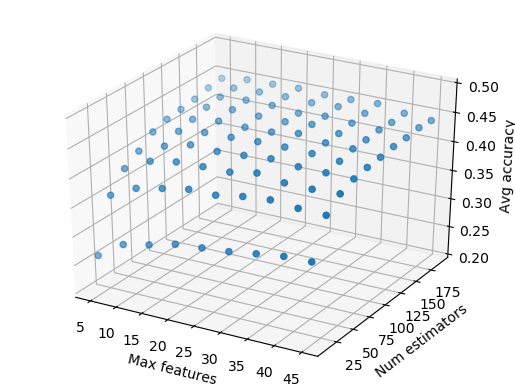

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') #gca means "get current axes"

ax.scatter3D(params[:,0], params[:,1], params[:,2])
# set x-axis,y-axis,z-axis limits
#ax.set_xlim(0, 50)
#ax.set_ylim(20,180)
ax.set_zlim(0.2, 0.5)
# set lables
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')

plt.show()